<div align="center">
      <h1>Introduction to Linear Classifiers</h1>
      <hr>
</div>

### Learning Objectives
The k-Nearest Neighbors (k-NN) classifier, while conceptually simple and easy to understand, has significant drawbacks, particularly in terms of computational expense during the testing phase. Furthermore, its performance in many real-world applications tends to be suboptimal, which highlights the need for more efficient and scalable classifiers. In this assignment, we will shift our focus to a more robust approach by implementing a linear classifier. This classifier will be trained using stochastic gradient descent (SGD), a powerful optimization technique widely used in machine learning.

Understanding the linear classifier and mastering its implementation is a crucial foundation for progressing to more complex models like neural networks, which we will cover in future assignments. Along the way, you will gain insights into key considerations such as choosing the optimal learning rate and regularization strength, both of which can significantly impact the model's performance. You will also have the opportunity to visualize the learned weights of the classifier, which will provide a deeper understanding of how the model makes decisions based on input data.



In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

### The Data We'll Use

In this assignment, we will continue working with the same dataset that was previously used in the k-Nearest Neighbors (k-NN) classifier. This consistency allows for a meaningful, direct comparison between the performance of the two classifiers — helping us better understand their strengths and weaknesses in various scenarios.

The dataset is often referred to as linearly separable, meaning that it is possible to draw a straight line (or hyperplane in higher dimensions) that almost perfectly divides the data points into their respective classes. However, it's crucial to keep in mind that this ideal scenario doesn’t always apply to real-world data. In many cases, classes are not linearly separable, making a linear classifier less effective. When that happens, more advanced approaches become necessary, which we will explore in future assignments.

For now, let’s focus on loading the dataset and visualizing it to get a better sense of its structure before diving into the implementation of the linear classifier.

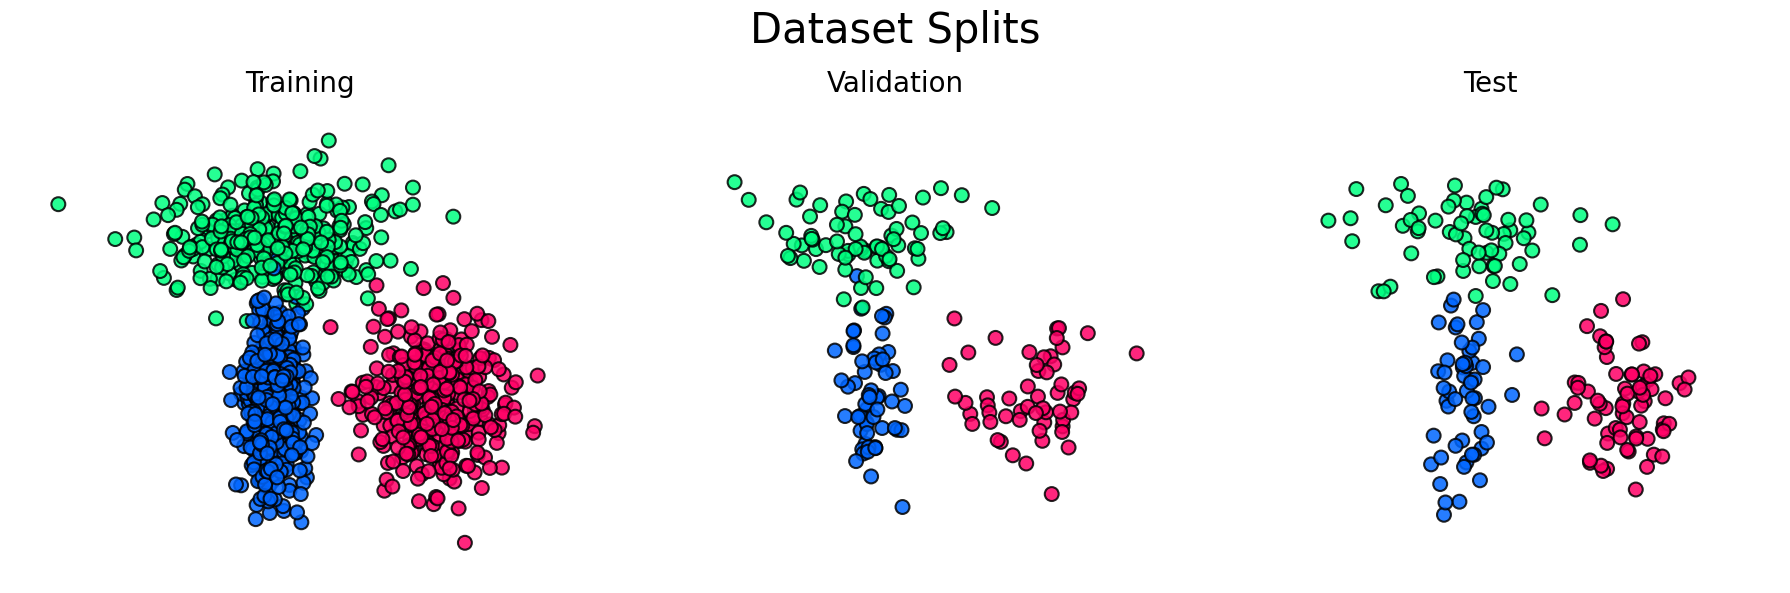

---------------- Training data ----------------
X_train shape: torch.Size([1125, 2]), y_train shape: torch.Size([1125])

---------------- Validation data ----------------
X_val shape: torch.Size([187, 2]), y_val shape: torch.Size([187])

---------------- Testing data ----------------
X_test shape: torch.Size([188, 2]), y_test shape: torch.Size([188])

---------------- Dataset info ----------------
Number of classes: 3
Number of features: 2
Number of samples in dataset: 1500
Number of samples in training set: 1125, which is 75.00% of the dataset
Number of samples in validation set: 187, which is 12.47% of the dataset
Number of samples in testing set: 188, which is 12.53% of the dataset


In [2]:
import torch
import numpy as np

from utils import Data2DVisualizer, dataset_stats

# Load the dataset
dataset = np.load('data/datasets/linearly_separable.npz')

X_train = torch.from_numpy(dataset['X_train']).float()
y_train = torch.from_numpy(dataset['y_train']).long()

X_val = torch.from_numpy(dataset['X_val']).float()
y_val = torch.from_numpy(dataset['y_val']).long()

X_test = torch.from_numpy(dataset['X_test']).float()
y_test = torch.from_numpy(dataset['y_test']).long()

vis = Data2DVisualizer((X_train, y_train), (X_val, y_val), (X_test, y_test))
vis.show_dataset()

num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

Training: 100%|██████████| 1000/1000 [00:00<00:00, 7009.17it/s]


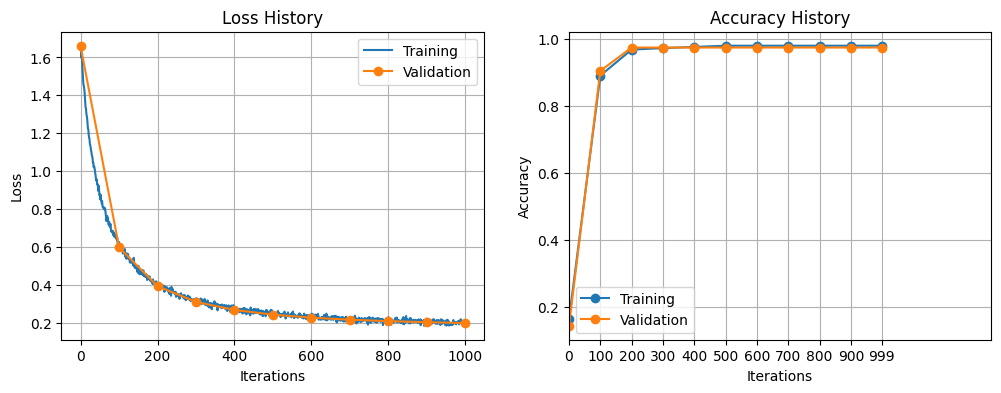

In [17]:
import torch

from utils import plot_training
from assignments import LinearClassifier

torch.random.manual_seed(69)

# Create a linear classifier
linear_classifier = LinearClassifier(num_features=2, num_classes=3, 
                                     learning_rate=1e-1, num_iters=1000, 
                                     batch_size=500)

# Train the classifier
loss_history, acc_history = linear_classifier.train(X_train, y_train, X_val, y_val)

# Visualize the training process
plot_training(loss_history, acc_history)

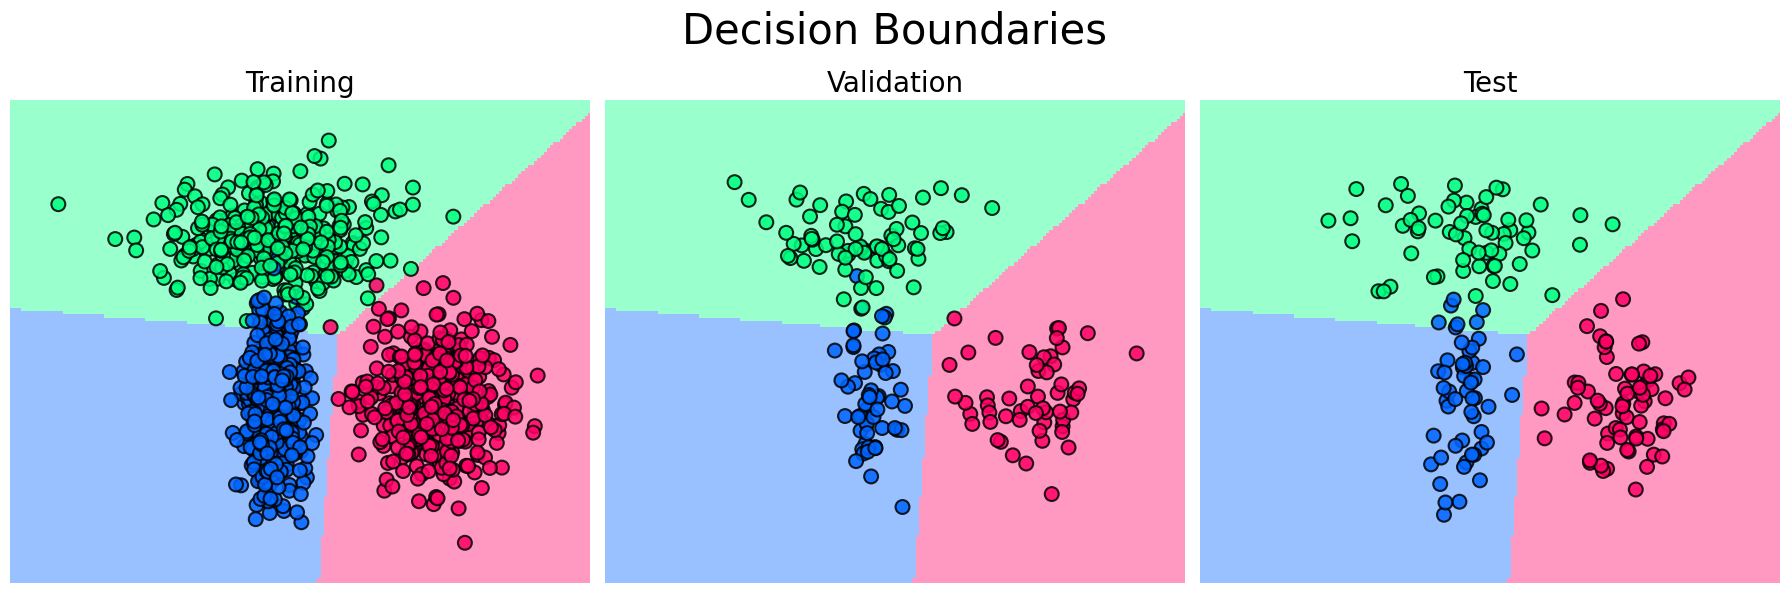

In [18]:
vis.show_decision_boundaries(linear_classifier, h=0.02)

In [19]:
vis.show_decision_functions(linear_classifier)